# Signal decomposition by Fourier

## configuration

In [18]:
import numpy as np
# https://numpy.org/doc/stable/reference/routines.fft.html
from numpy.fft import fft, rfft, irfft, rfftfreq
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
from matplotlib import pyplot as plt

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.electrocardiogram.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.datasets.electrocardiogram.html
from scipy.misc import electrocardiogram # deprecated since version 1.10.0 - use scipy.datasets.electrocardiogram

# https://neuropsychology.github.io/NeuroKit/
import neurokit2 as nk

## data preparation to simulate signal composition

In [19]:
x = np.linspace(-np.pi, np.pi*100, 100)
ecg1 = np.sin(x)
ecg2 = np.tan(x) / 10
composition = ecg1 + ecg2

In [20]:
# ecg1 = electrocardiogram()
# length = len(ecg1)
# mu, sigma = 0, 0.01
# noise = np.random.normal(mu, sigma, [1, length])
# ecg2 = ecg1 + noise[0]
# # https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html
# positions = np.random.randint(800, 9000, 100)
# # https://numpy.org/doc/stable/reference/generated/numpy.nditer.html
# positions_it = np.nditer(positions, flags=['f_index'])
# insertions = np.random.randint(500, 1000, 100)
# index = 0
# while index < length:
#     for position in positions_it:
#         if index + insertions[positions_it.index] < length:
#             insertion = noise[0][index:index+insertions[positions_it.index]] + ecg1[index]
#             # https://numpy.org/doc/stable/reference/generated/numpy.insert.html
#             ecg1 = np.insert(ecg1, index, insertion)
#             index = index + position
# ecg1 = ecg1[0:length]
# composition = ecg1 + ecg2
# x = np.arange(0, len(composition))

In [21]:
# ecg1 = nk.ecg_simulate(duration=10, heart_rate=80, heart_rate_std=20, sampling_rate=10800)
# ecg2 = nk.ecg_simulate(duration=10, heart_rate=50, heart_rate_std=5, sampling_rate=10800)
# composition = ecg1 + ecg2
# x = np.arange(0, len(composition))

In [22]:
# ecg = 0
# sample = 1
# decomposition = np.load(f'decomposition.by.ml.{sample}.npy')
# y_test = np.load(f'y_test.by.ml.{sample}.npy')
# composition = decomposition[:, ecg]
# x = np.arange(0, len(composition))

## signal decomposition

### [example](https://www.kaggle.com/code/residentmario/signal-decomposition-with-fast-fourier-transforms)

In [23]:
def perform_fourier_transform(signal, sampling_rate):
    n = len(signal)
    frequencies = np.fft.fftfreq(n, d=1/sampling_rate)
    fft_result = np.fft.fft(signal)
    return frequencies, fft_result

def plot_signal_and_spectrum(signal, frequencies, spectrum):
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(signal)
    plt.title("Segnale di Elettrocardiogramma")
    plt.xlabel("Campioni")
    plt.ylabel("Amplitude")

    plt.subplot(2, 1, 2)
    plt.plot(frequencies, np.abs(spectrum))
    plt.title("Spettro di Frequenze")
    plt.xlabel("Frequenza (Hz)")
    plt.ylabel("Ampiezza")

    plt.tight_layout()
    plt.show()

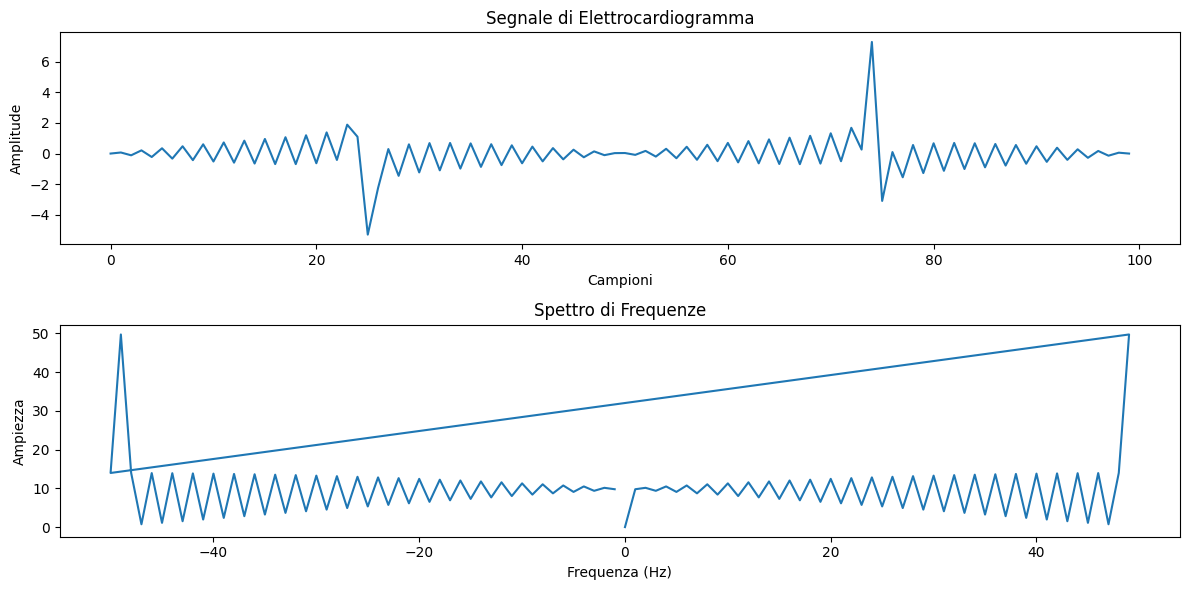

In [24]:
frequencies, spectrum = perform_fourier_transform(composition, len(composition))
plot_signal_and_spectrum(composition, frequencies, spectrum)

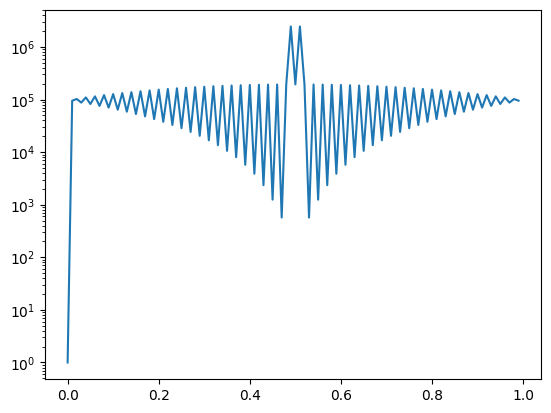

In [25]:
fourier = abs(fft(composition))
num=np.size(x)
freq = [i / num for i in list(range(num))]
spectrum = fourier.real * fourier.real + fourier.imag * fourier.imag
nspectrum = spectrum/spectrum[0]
plt.semilogy(freq,nspectrum)

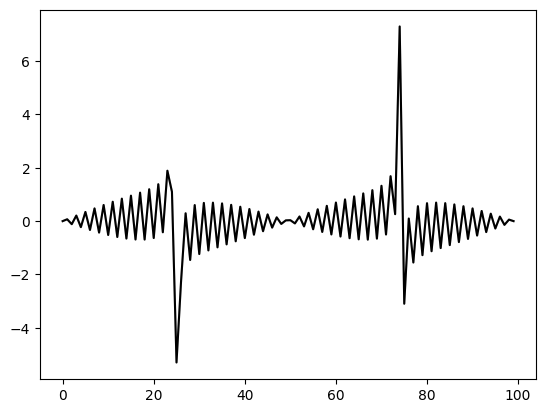

In [26]:
def low_pass(s, threshold=1e4):
    fourier = rfft(s)
    frequencies = rfftfreq(s.size)#, d=2e-2 / s.size)
    fourier[frequencies > threshold] = 0
    return irfft(fourier)

lf_signal_1 = low_pass(composition)
plt.plot(composition, color='lightgray')
plt.plot(lf_signal_1, color='black')

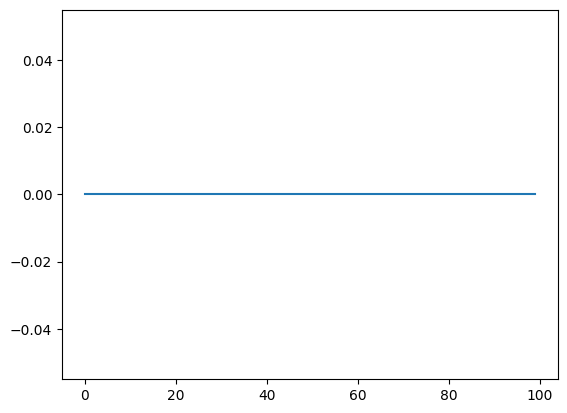

In [27]:
def high_pass(s, threshold=1e7):
    fourier = rfft(s)
    frequencies = rfftfreq(s.size)#, d=2e-2/s.size)
    fourier[frequencies < threshold] = 0
    return irfft(fourier)

hf_signal_1 = high_pass(composition, threshold=1e4)

plt.plot(hf_signal_1)

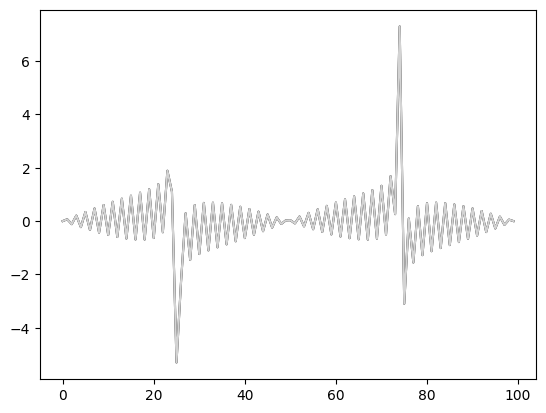

In [28]:
plt.plot(composition, color='black')
plt.plot(lf_signal_1 + hf_signal_1, color='lightgray')

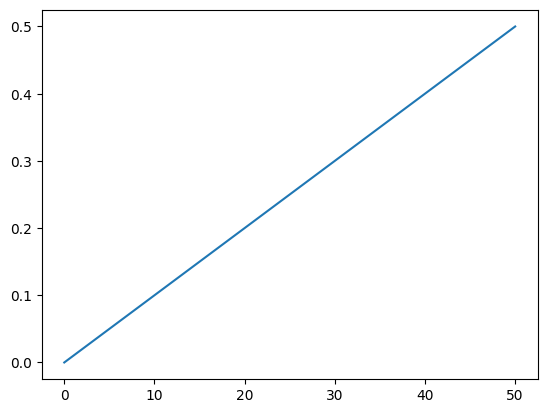

In [29]:
plt.plot(rfftfreq(composition.size))#, d=2e-2 / composition.size))

In [30]:
def decompose_into_n_signals(srs, n):
    fourier = rfft(srs)
    frequencies = rfftfreq(srs.size)#, d=2e-2/srs.size)
    out = []
    for vals in np.array_split(frequencies, n):
        ft_threshed = fourier.copy()
        ft_threshed[(vals.min() > frequencies)] = 0
        ft_threshed[(vals.max() < frequencies)] = 0        
        out.append(irfft(ft_threshed))
    return out

def plot_n_signals(sigs):
    fig, axarr = plt.subplots(len(sigs), figsize=(12, 12))
    for i, sig in enumerate(sigs):
        plt.sca(axarr[i])
        plt.plot(sig)
    plt.gcf().suptitle(f"Decomposition of signal into {len(sigs)} frequency bands", fontsize=24)

In [31]:
# plt.figure(figsize=(12,6))
# plt.plot(y_test[:, ecg])

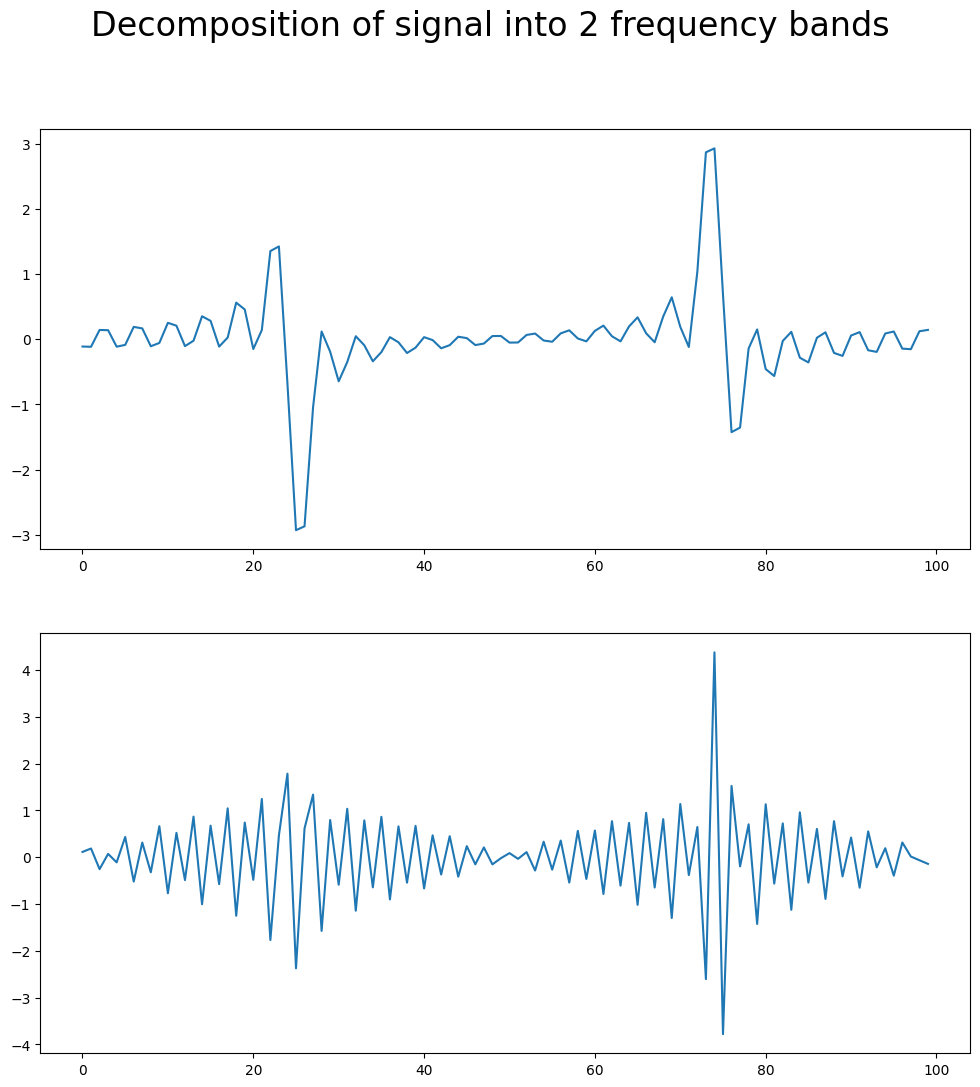

In [32]:
decomposition = decompose_into_n_signals(composition, 2)
plot_n_signals(decomposition)